In [1]:
#Load libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os

In [2]:
#Import working_dataset 
os.chdir("/rds/general/project/hda_students_data/live/Group9/General/Data")
data = pd.read_csv('working_dataset_2.csv', low_memory=False)

In [5]:
#Check data shape
data.shape

(15825, 3552)

In [3]:
#Check columns names
data.columns

Index(['Unnamed: 0', 'eid', 'V1.x', 'X', 'X54.0.0', 'X54.1.0', 'X54.2.0',
       'X5452.0.0', 'X5452.1.0', 'X5452.2.0',
       ...
       'X1970.1.0', 'X1970.2.0', 'X1980.0.0', 'X1980.1.0', 'X1980.2.0', 'V1.y',
       'X21003.0.0.y', 'X31.0.0.y', 'casecont', 'triplet_id'],
      dtype='object', length=3552)

In [4]:
#Remove triplet_id and other variables that we don't want our prediction to be based on from dataset --> would bias our results
#Specifically removing age at recruitment, age when attented assessment center, year of birth, month of birth and sex variables.
data.drop(['triplet_id','V1.x','X','V1.y','Unnamed: 0','X21003.0.0.y','X31.0.0.y','casecont','X52.0.0','X31.0.0.x','X34.0.0','X21022.0.0','X21003.0.0.x','X21003.1.0','X21003.2.0'], axis =1, inplace = True)

In [5]:
#Check shape & columns after drop
print(data.shape)
print(data.columns)

(15825, 3537)
Index(['eid', 'X54.0.0', 'X54.1.0', 'X54.2.0', 'X5452.0.0', 'X5452.1.0',
       'X5452.2.0', 'X5463.0.0', 'X5463.1.0', 'X5463.2.0',
       ...
       'X1950.2.0', 'X1960.0.0', 'X1960.1.0', 'X1960.2.0', 'X1970.0.0',
       'X1970.1.0', 'X1970.2.0', 'X1980.0.0', 'X1980.1.0', 'X1980.2.0'],
      dtype='object', length=3537)


In [6]:
#Print information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15825 entries, 0 to 15824
Columns: 3537 entries, eid to X1980.2.0
dtypes: float64(2477), int64(1), object(1059)
memory usage: 427.0+ MB


In [7]:
#Import dataset cases_controls_triplet_ID
eids_to_keep = pd.read_csv('eid_list.csv', low_memory=False)

In [8]:
#Check the shape of eids_to_keep
eids_to_keep.shape

(15356, 3)

In [9]:
#Check columns in eids_to_keep that have to be further removed.
eids_to_keep.columns

Index(['eid', 'casecont', 'triplet_id'], dtype='object')

In [10]:
df = pd.merge(data,eids_to_keep, on=['eid'], how='inner')

In [11]:
#Create a dataframe with eids_to_keep as index.
#df = pd.concat([eids_to_keep, data], axis=1).reindex(eids_to_keep.index)

In [11]:
#Check shape & columns from new dataframe
print(df.shape)
print(df.columns)

(15356, 3539)
Index(['eid', 'X54.0.0', 'X54.1.0', 'X54.2.0', 'X5452.0.0', 'X5452.1.0',
       'X5452.2.0', 'X5463.0.0', 'X5463.1.0', 'X5463.2.0',
       ...
       'X1960.1.0', 'X1960.2.0', 'X1970.0.0', 'X1970.1.0', 'X1970.2.0',
       'X1980.0.0', 'X1980.1.0', 'X1980.2.0', 'casecont', 'triplet_id'],
      dtype='object', length=3539)


In [12]:
#Drop columns that are not of interest. Keep casecont for later to set target variable when running FAMD.
#Remove triplet_id.
df.drop(['triplet_id'], axis =1, inplace = True)

In [13]:
#Check shape & columns after drop
print(df.shape)
print(df.columns)

(15356, 3538)
Index(['eid', 'X54.0.0', 'X54.1.0', 'X54.2.0', 'X5452.0.0', 'X5452.1.0',
       'X5452.2.0', 'X5463.0.0', 'X5463.1.0', 'X5463.2.0',
       ...
       'X1960.0.0', 'X1960.1.0', 'X1960.2.0', 'X1970.0.0', 'X1970.1.0',
       'X1970.2.0', 'X1980.0.0', 'X1980.1.0', 'X1980.2.0', 'casecont'],
      dtype='object', length=3538)


In [14]:
#Create target variable
target = df['casecont']
#Drop casecont once target is created
df.drop('casecont', axis = 1, inplace = True)

In [15]:
#Check shape & columns after drop of casecont
print(df.shape)
print(df.columns)

(15356, 3537)
Index(['eid', 'X54.0.0', 'X54.1.0', 'X54.2.0', 'X5452.0.0', 'X5452.1.0',
       'X5452.2.0', 'X5463.0.0', 'X5463.1.0', 'X5463.2.0',
       ...
       'X1950.2.0', 'X1960.0.0', 'X1960.1.0', 'X1960.2.0', 'X1970.0.0',
       'X1970.1.0', 'X1970.2.0', 'X1980.0.0', 'X1980.1.0', 'X1980.2.0'],
      dtype='object', length=3537)


In [16]:
#Create a list of strings for variables you want to include in the PCA.
mylist = ("eid",".0.0")

In [17]:
#You only want variables ending by that the strings in mylist
df = df.loc[:, df.columns.str.endswith(mylist)]

In [18]:
#Drop columns with only NAs
df.dropna(how='all', axis=1, inplace=True)

In [19]:
#Print df shape & columns
print(df.shape)
print(df.columns)

(15356, 528)
Index(['eid', 'X54.0.0', 'X5452.0.0', 'X5463.0.0', 'X5474.0.0', 'X5485.0.0',
       'X5496.0.0', 'X53.0.0', 'X5364.0.0', 'X3404.0.0',
       ...
       'X20124.0.0', 'X20125.0.0', 'X20123.0.0', 'X1920.0.0', 'X1930.0.0',
       'X1940.0.0', 'X1950.0.0', 'X1960.0.0', 'X1970.0.0', 'X1980.0.0'],
      dtype='object', length=528)


In [20]:
#Print df info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15356 entries, 0 to 15355
Columns: 528 entries, eid to X1980.0.0
dtypes: float64(268), int64(1), object(259)
memory usage: 62.0+ MB


SEPARATE DATASET INTO NUMERICAL AND CATEGORICAL DATASETS FOR ONE-HOT ENCODING

In [21]:
#Separation of df into two datasets
df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [22]:
#Get dummies for categorical variables as we want to run a PCA
df_categorical = pd.get_dummies(df_categorical)

In [23]:
#Merge back numerical and categorical dataset into df, now that dummies are created.
df = pd.concat([df_numerical.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis=1)

In [24]:
#Check shape
print(df.shape)
print(df.info())

(15356, 25839)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15356 entries, 0 to 15355
Columns: 25839 entries, eid to X40021.0.0_SCOT
dtypes: float64(268), int64(1), uint8(25570)
memory usage: 406.0 MB
None


In [25]:
#Check what the dataframe looks like
df.head(5)

,eid,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,...,X3393.0.0_Prefer not to answer,X3393.0.0_Yes,X4792.0.0_No,X4792.0.0_Prefer not to answer,X4792.0.0_Yes,X40020.0.0_E/W,X40020.0.0_SCOT,X40021.0.0_E/W,X40021.0.0_NCIN,X40021.0.0_SCOT
0,1000015,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.69489,NaN,...,0,0,1,0,0,0,0,1,0,0
1,1000027,3.0,NaN,NaN,NaN,NaN,NaN,NaN,-3.88956,NaN,...,0,0,1,0,0,0,0,0,0,0
2,1000039,3.0,NaN,39.846,98.912,119.238,0.678,NaN,-2.75102,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1000040,3.0,0.0,NaN,NaN,NaN,NaN,NaN,-5.79733,3.20,...,0,0,1,0,0,0,0,0,0,0
4,1000053,3.0,NaN,46.496,81.653,94.516,0.521,NaN,-3.65910,4.08,...,0,0,0,0,0,1,0,0,0,0


SPLIT THE DATASET

In [26]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=8)

In [27]:
#Print shape of X_train & X_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11517, 25839)
(3839, 25839)
(11517,)
(3839,)


In [28]:
#Print columns of X_train & X_test
print(X_train.columns)
print(X_test.columns)

Index(['eid', 'X3137.0.0', 'X3140.0.0', 'X3143.0.0', 'X3144.0.0', 'X3147.0.0',
       'X3148.0.0', 'X3160.0.0', 'X189.0.0', 'X20022.0.0',
       ...
       'X3393.0.0_Prefer not to answer', 'X3393.0.0_Yes', 'X4792.0.0_No',
       'X4792.0.0_Prefer not to answer', 'X4792.0.0_Yes', 'X40020.0.0_E/W',
       'X40020.0.0_SCOT', 'X40021.0.0_E/W', 'X40021.0.0_NCIN',
       'X40021.0.0_SCOT'],
      dtype='object', length=25839)
Index(['eid', 'X3137.0.0', 'X3140.0.0', 'X3143.0.0', 'X3144.0.0', 'X3147.0.0',
       'X3148.0.0', 'X3160.0.0', 'X189.0.0', 'X20022.0.0',
       ...
       'X3393.0.0_Prefer not to answer', 'X3393.0.0_Yes', 'X4792.0.0_No',
       'X4792.0.0_Prefer not to answer', 'X4792.0.0_Yes', 'X40020.0.0_E/W',
       'X40020.0.0_SCOT', 'X40021.0.0_E/W', 'X40021.0.0_NCIN',
       'X40021.0.0_SCOT'],
      dtype='object', length=25839)


KEEP EIDS OF BOTH X_TRAIN AND X_TEST FOR FUTURE MERGE WITH HESIN

In [29]:
#Check dtype of variable X_train & X_test
print(X_train.dtypes.unique())
print(X_test.dtypes.unique())

[dtype('int64') dtype('float64') dtype('uint8')]
[dtype('int64') dtype('float64') dtype('uint8')]


In [30]:
#Set eid as index for X_train
X_train = X_train.set_index(['eid'])

In [31]:
#Check that it has successfully been implemented
X_train.head(3)

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X3393.0.0_Prefer not to answer,X3393.0.0_Yes,X4792.0.0_No,X4792.0.0_Prefer not to answer,X4792.0.0_Yes,X40020.0.0_E/W,X40020.0.0_SCOT,X40021.0.0_E/W,X40021.0.0_NCIN,X40021.0.0_SCOT
eid,,,,,,,,,,,,,,,,,,,,,
1011243,3.0,NaN,49.495,97.214,106.894,0.600,NaN,-4.72156,3.52,76.0,...,0,0,0,0,0,0,0,0,0,0
1085637,3.0,NaN,47.643,71.371,88.458,0.483,NaN,-5.23403,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1009332,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.44697,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0


In [32]:
#Set eid as index for X_test
X_test = X_test.set_index(['eid'])

In [33]:
#Check that it has successfully been implemented
X_test.head(3)

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X3393.0.0_Prefer not to answer,X3393.0.0_Yes,X4792.0.0_No,X4792.0.0_Prefer not to answer,X4792.0.0_Yes,X40020.0.0_E/W,X40020.0.0_SCOT,X40021.0.0_E/W,X40021.0.0_NCIN,X40021.0.0_SCOT
eid,,,,,,,,,,,,,,,,,,,,,
1078679,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-3.633130,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
5342074,3.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.876334,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
1653718,3.0,NaN,NaN,NaN,NaN,NaN,NaN,-3.013460,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


IMPUTATION TRAINING SET

In [34]:
#Split X_train into two dataframes - one with only numerical variables and the other one with only categorical variables.
X_train_numerical = X_train.select_dtypes(include='float64')
X_train_categorical = X_train.select_dtypes(include='uint8')

In [35]:
#Print columns of X_train_numerical & X_train_categorical to check if split was successful
print(X_train_numerical.columns)
print(X_train_categorical.columns)

Index(['X3137.0.0', 'X3140.0.0', 'X3143.0.0', 'X3144.0.0', 'X3147.0.0',
       'X3148.0.0', 'X3160.0.0', 'X189.0.0', 'X20022.0.0', 'X20121.0.0',
       ...
       'X20124.0.0', 'X20125.0.0', 'X20123.0.0', 'X1920.0.0', 'X1930.0.0',
       'X1940.0.0', 'X1950.0.0', 'X1960.0.0', 'X1970.0.0', 'X1980.0.0'],
      dtype='object', length=268)
Index(['X54.0.0_Barts', 'X54.0.0_Birmingham', 'X54.0.0_Bristol',
       'X54.0.0_Bury', 'X54.0.0_Cardiff', 'X54.0.0_Croydon',
       'X54.0.0_Edinburgh', 'X54.0.0_Glasgow', 'X54.0.0_Hounslow',
       'X54.0.0_Leeds',
       ...
       'X3393.0.0_Prefer not to answer', 'X3393.0.0_Yes', 'X4792.0.0_No',
       'X4792.0.0_Prefer not to answer', 'X4792.0.0_Yes', 'X40020.0.0_E/W',
       'X40020.0.0_SCOT', 'X40021.0.0_E/W', 'X40021.0.0_NCIN',
       'X40021.0.0_SCOT'],
      dtype='object', length=25570)


In [36]:
#Print info of X_train_numerical & X_train_categorical
print(X_train_numerical.info())
print(X_train_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11517 entries, 1011243 to 1047338
Columns: 268 entries, X3137.0.0 to X1980.0.0
dtypes: float64(268)
memory usage: 23.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11517 entries, 1011243 to 1047338
Columns: 25570 entries, X54.0.0_Barts to X40021.0.0_SCOT
dtypes: uint8(25570)
memory usage: 280.9 MB
None


In [37]:
#For numerical columns in X_train, replace by median of each column all NAs in that column
X_train_numerical.fillna(X_train_numerical.mean(), inplace=True)

/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [38]:
#Print column with only NAs that could potentially remain after imputation
X_train_numerical.columns[X_train_numerical.isnull().any()].tolist()

[]

In [39]:
#Print first five rows to check if NAs have successfully been replaced
X_train_numerical.head()

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X20124.0.0,X20125.0.0,X20123.0.0,X1920.0.0,X1930.0.0,X1940.0.0,X1950.0.0,X1960.0.0,X1970.0.0,X1980.0.0
eid,,,,,,,,,,,,,,,,,,,,,
1011243,3.0,0.003044,49.495000,97.214000,106.894000,0.600000,80.37672,-4.72156,3.520000,76.000000,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1085637,3.0,0.003044,47.643000,71.371000,88.458000,0.483000,80.37672,-5.23403,3.338512,60.992701,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1009332,3.0,0.003044,43.989669,77.429674,97.370057,0.539526,80.37672,2.44697,3.338512,60.992701,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3987492,3.0,0.003044,49.124000,84.118000,106.867000,0.599000,80.37672,-3.68404,3.338512,60.992701,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1029035,3.0,0.000000,43.989669,77.429674,97.370057,0.539526,80.37672,-2.54584,4.590000,60.992701,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [40]:
#Look for sum of null values that may not have been removed after imputation in dataframe
X_train_numerical.isnull().sum().sum()

0

In [41]:
#Check number of NAs in X_train_categorical - if not null, undertake an imputation
X_train_categorical.isnull().sum().sum()

0

REPEAT THE IMPUTATION STEPS FOR X_TEST

In [42]:
#Print information of X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3839 entries, 1078679 to 1039726
Columns: 25838 entries, X3137.0.0 to X40021.0.0_SCOT
dtypes: float64(268), uint8(25570)
memory usage: 101.5 MB


In [43]:
#Split X_test into two dataframes - one with only numerical variables and the other one with only categorical variables.
X_test_numerical = X_test.select_dtypes(include='float64')
X_test_categorical = X_test.select_dtypes(include='uint8')

In [44]:
#Print columns of X_test_numerical & X_test_categorical to check if split was successful
print(X_test_numerical.columns)
print(X_test_categorical.columns)

Index(['X3137.0.0', 'X3140.0.0', 'X3143.0.0', 'X3144.0.0', 'X3147.0.0',
       'X3148.0.0', 'X3160.0.0', 'X189.0.0', 'X20022.0.0', 'X20121.0.0',
       ...
       'X20124.0.0', 'X20125.0.0', 'X20123.0.0', 'X1920.0.0', 'X1930.0.0',
       'X1940.0.0', 'X1950.0.0', 'X1960.0.0', 'X1970.0.0', 'X1980.0.0'],
      dtype='object', length=268)
Index(['X54.0.0_Barts', 'X54.0.0_Birmingham', 'X54.0.0_Bristol',
       'X54.0.0_Bury', 'X54.0.0_Cardiff', 'X54.0.0_Croydon',
       'X54.0.0_Edinburgh', 'X54.0.0_Glasgow', 'X54.0.0_Hounslow',
       'X54.0.0_Leeds',
       ...
       'X3393.0.0_Prefer not to answer', 'X3393.0.0_Yes', 'X4792.0.0_No',
       'X4792.0.0_Prefer not to answer', 'X4792.0.0_Yes', 'X40020.0.0_E/W',
       'X40020.0.0_SCOT', 'X40021.0.0_E/W', 'X40021.0.0_NCIN',
       'X40021.0.0_SCOT'],
      dtype='object', length=25570)


In [45]:
#Print info of X_test_numerical & X_test_categorical
print(X_test_numerical.info())
print(X_test_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3839 entries, 1078679 to 1039726
Columns: 268 entries, X3137.0.0 to X1980.0.0
dtypes: float64(268)
memory usage: 7.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3839 entries, 1078679 to 1039726
Columns: 25570 entries, X54.0.0_Barts to X40021.0.0_SCOT
dtypes: uint8(25570)
memory usage: 93.6 MB
None


In [46]:
#For numerical columns in X_test, replace by median of each column all NAs in that column
X_test_numerical.fillna(X_test_numerical.mean(), inplace=True)

/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [47]:
#Print column with only NAs that could potentially remain after imputation
X_test_numerical.columns[X_test_numerical.isnull().any()].tolist()

['X102970.0.0', 'X4207.0.0', 'X22172.0.0', 'X10132.0.0']

In [48]:
#Check first 5 rows to have a sense of what X_test_numerical dataframe looks like
X_test_numerical.head(5)

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X20124.0.0,X20125.0.0,X20123.0.0,X1920.0.0,X1930.0.0,X1940.0.0,X1950.0.0,X1960.0.0,X1970.0.0,X1980.0.0
eid,,,,,,,,,,,,,,,,,,,,,
1078679,2.0,0.001438,43.996096,77.204799,96.954195,0.53699,84.288136,-3.633130,3.347003,61.150538,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
5342074,3.0,0.001438,43.996096,77.204799,96.954195,0.53699,84.288136,-0.876334,3.347003,61.150538,...,1.0,1.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
1653718,3.0,0.001438,43.996096,77.204799,96.954195,0.53699,84.288136,-3.013460,3.347003,61.150538,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1693933,2.0,0.001438,43.996096,77.204799,96.954195,0.53699,84.288136,-3.435530,3.347003,61.150538,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1035064,3.0,0.000000,43.996096,77.204799,96.954195,0.53699,84.288136,-1.288730,3.180000,61.150538,...,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,1.0,1.0


In [49]:
#Look for sum of null values that may not have been removed after imputation in dataframe
X_test_numerical.isnull().sum().sum()

15356

In [50]:
#Check number of NAs in X_train_categorical - if not null, undertake an imputation
X_test_categorical.isnull().sum().sum()

0

REMOVING THE FEW NAs REMAINING IN NUMERICAL DATASETS COMING FROM EMPTY COLUMNS IN X_TRAIN_NUMERICAL OR X_TEST_NUMERICAL

In [51]:
#Drop the variables that have either NAs in X_test or X_train in both datasets to have same number of columns in X_train_numerical and X_train_categorical.
X_train_numerical.drop(['X102970.0.0','X22172.0.0','X10132.0.0','X4207.0.0'], axis =1, inplace = True)
X_test_numerical.drop(['X102970.0.0','X22172.0.0','X10132.0.0','X4207.0.0'], axis =1, inplace = True)
#Print shapes --> Make sure they are equal
print(X_train_numerical.shape)
print(X_test_numerical.shape)

(11517, 264)
(3839, 264)


/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
#Make sure all null values got removed in X_train_numerical
X_train_numerical.isnull().sum().sum()

0

In [53]:
#Make sure all null values got removed in X_test_numerical
X_test_numerical.isnull().sum().sum()

0

CHANGE DATATYPES OF NUMERICAL DATASETS

In [54]:
#Check datatype of X_train_numerical
X_train_numerical.dtypes

X3137.0.0    float64
X3140.0.0    float64
X3143.0.0    float64
X3144.0.0    float64
X3147.0.0    float64
              ...   
X1940.0.0    float64
X1950.0.0    float64
X1960.0.0    float64
X1970.0.0    float64
X1980.0.0    float64
Length: 264, dtype: object

In [55]:
#Check datatype of X_test_numerical
X_test_numerical.dtypes

X3137.0.0    float64
X3140.0.0    float64
X3143.0.0    float64
X3144.0.0    float64
X3147.0.0    float64
              ...   
X1940.0.0    float64
X1950.0.0    float64
X1960.0.0    float64
X1970.0.0    float64
X1980.0.0    float64
Length: 264, dtype: object

In [157]:
#We observe that X_train_numerical has float64 variables type. We want to change them as int64 as they are numerical variables.
#Change float64 to int64
X_train_numerical.iloc[:,:] = X_train_numerical.iloc[:,:].astype('int')
print(X_train_numerical.dtypes)

X3137.0.0    int64
X3140.0.0    int64
X3143.0.0    int64
X3144.0.0    int64
X3147.0.0    int64
             ...  
X1940.0.0    int64
X1950.0.0    int64
X1960.0.0    int64
X1970.0.0    int64
X1980.0.0    int64
Length: 264, dtype: object


/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
#We observe that X_test_numerical has float64 variables type. We want to change them as int64 as they are numerical variables.
#Change float64 to int64
X_test_numerical.iloc[:,:] = X_test_numerical.iloc[:,:].astype('int')
print(X_test_numerical.dtypes)

X3137.0.0    int64
X3140.0.0    int64
X3143.0.0    int64
X3144.0.0    int64
X3147.0.0    int64
             ...  
X1940.0.0    int64
X1950.0.0    int64
X1960.0.0    int64
X1970.0.0    int64
X1980.0.0    int64
Length: 264, dtype: object


/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NORMALIZE THE NUMERICAL VARIABLES

In [56]:
#Normalize the data
sc = StandardScaler()
sc.fit(X_train_numerical)
X_train_numerical = pd.DataFrame(sc.transform(X_train_numerical), index = X_train_numerical.index, columns = X_train_numerical.columns)

In [57]:
#Make sure it is a standardized dataframe
X_train_numerical.head()

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X20124.0.0,X20125.0.0,X20123.0.0,X1920.0.0,X1930.0.0,X1940.0.0,X1950.0.0,X1960.0.0,X1970.0.0,X1980.0.0
eid,,,,,,,,,,,,,,,,,,,,,
1011243,0.628254,0.000000,1.606479e+00,1.396298e+00,5.960201e-01,6.001973e-01,5.880737e-15,-1.072567,3.658267e-01,4.755231e+00,...,0.0,0.0,0.0,-0.710468,1.156153,-0.393906,-0.910482,-0.652145,-0.410483,0.850234
1085637,0.628254,0.000000,1.066058e+00,-4.275969e-01,-5.577275e-01,-5.610131e-01,5.880737e-15,-1.244608,1.109991e-13,-6.754303e-15,...,0.0,0.0,0.0,1.094500,-0.728330,-0.393906,-0.910482,-0.652145,-0.410483,0.850234
1009332,0.628254,0.000000,-6.220181e-15,7.020616e-15,9.782661e-15,-5.509412e-15,5.880737e-15,1.333981,1.109991e-13,-6.754303e-15,...,0.0,0.0,0.0,1.094500,1.156153,1.521658,0.880579,1.204668,1.722618,-0.888022
3987492,0.628254,0.000000,1.498220e+00,4.720353e-01,5.943304e-01,5.902724e-01,5.880737e-15,-0.724261,1.109991e-13,-6.754303e-15,...,0.0,0.0,0.0,1.094500,-0.728330,-0.393906,0.880579,1.204668,-0.410483,-0.888022
1029035,0.628254,-0.055271,-6.220181e-15,7.020616e-15,9.782661e-15,-5.509412e-15,5.880737e-15,-0.342156,2.522633e+00,-6.754303e-15,...,0.0,0.0,0.0,1.094500,1.156153,-0.393906,0.880579,1.204668,-0.410483,0.850234


In [58]:
#Apply scaler to test set
X_test_numerical = pd.DataFrame(sc.transform(X_test_numerical), index = X_test_numerical.index, columns = X_test_numerical.columns)

In [59]:
#Make sure it is a standardized dataframe too
X_test_numerical.head()

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X20124.0.0,X20125.0.0,X20123.0.0,X1920.0.0,X1930.0.0,X1940.0.0,X1950.0.0,X1960.0.0,X1970.0.0,X1980.0.0
eid,,,,,,,,,,,,,,,,,,,,,
1078679,-1.777396,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,-0.707170,0.017116,0.050012,...,0.0,0.0,0.0,-0.710468,-0.728330,-0.393906,0.880579,1.204668,-0.410483,0.850234
5342074,0.628254,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,0.218314,0.017116,0.050012,...,0.0,0.0,0.0,-2.515435,-0.728330,-0.393906,-0.910482,1.204668,-0.410483,-0.888022
1653718,0.628254,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,-0.499141,0.017116,0.050012,...,0.0,0.0,0.0,1.094500,1.156153,1.521658,0.880579,1.204668,-0.410483,-0.888022
1693933,-1.777396,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,-0.640834,0.017116,0.050012,...,0.0,0.0,0.0,-0.710468,-0.728330,-0.393906,-0.910482,-0.652145,-0.410483,-0.888022
1035064,0.628254,-0.055271,0.001875,-0.015871,-0.026025,-0.025172,1.618622,0.079869,-0.319514,0.050012,...,0.0,0.0,0.0,1.094500,1.156153,-2.309469,-0.910482,1.204668,1.722618,0.850234


In [62]:
X_test_numerical.mean().max()

97.96683112155458

In [61]:
X_train_numerical = X_train_numerical.drop('X102020.0.0', axis = 1)
X_test_numerical = X_test_numerical.drop('X102020.0.0', axis = 1)

In [63]:
#Check the datatypes of the 4 sub-datasets before concatenating
print(X_train_numerical.dtypes)
print(X_test_numerical.dtypes)
print(X_train_categorical.dtypes)
print(X_test_categorical.dtypes)

X3137.0.0    float64
X3140.0.0    float64
X3143.0.0    float64
X3144.0.0    float64
X3147.0.0    float64
              ...   
X1940.0.0    float64
X1950.0.0    float64
X1960.0.0    float64
X1970.0.0    float64
X1980.0.0    float64
Length: 263, dtype: object
X3137.0.0    float64
X3140.0.0    float64
X3143.0.0    float64
X3144.0.0    float64
X3147.0.0    float64
              ...   
X1940.0.0    float64
X1950.0.0    float64
X1960.0.0    float64
X1970.0.0    float64
X1980.0.0    float64
Length: 263, dtype: object
X54.0.0_Barts         uint8
X54.0.0_Birmingham    uint8
X54.0.0_Bristol       uint8
X54.0.0_Bury          uint8
X54.0.0_Cardiff       uint8
                      ...  
X40020.0.0_E/W        uint8
X40020.0.0_SCOT       uint8
X40021.0.0_E/W        uint8
X40021.0.0_NCIN       uint8
X40021.0.0_SCOT       uint8
Length: 25570, dtype: object
X54.0.0_Barts         uint8
X54.0.0_Birmingham    uint8
X54.0.0_Bristol       uint8
X54.0.0_Bury          uint8
X54.0.0_Cardiff       uint8
       

In [64]:
#Check that there are no NAs in sub-datasets before concatenating
print(X_train_categorical.isnull().sum().sum())
print(X_train_numerical.isnull().sum().sum())
print(X_test_categorical.isnull().sum().sum())
print(X_test_numerical.isnull().sum().sum())

0
0
0
0


CONCATENATE

In [65]:
#Now that imputation has been successfully made for both numerical and categorical variables, 
#Merge back X_train_categorical and X_train_numerical and rename it to X_train. 
X_train = pd.concat([X_train_numerical, X_train_categorical], axis=1)

In [66]:
#Now that imputation has been successfully made for both numerical and categorical variables, 
#Merge back X_test_categorical and X_test_numerical and rename it to X_test. 
X_test = pd.concat([X_test_numerical, X_test_categorical], axis=1)

In [67]:
#Make sure you have null values in both datasets after concatenate
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [68]:
#Make sure that X_train and X_test have same number of columns
print(X_train.shape)
print(X_test.shape)

(11517, 25833)
(3839, 25833)


In [69]:
X_train.columns

Index(['X3137.0.0', 'X3140.0.0', 'X3143.0.0', 'X3144.0.0', 'X3147.0.0',
       'X3148.0.0', 'X3160.0.0', 'X189.0.0', 'X20022.0.0', 'X20121.0.0',
       ...
       'X3393.0.0_Prefer not to answer', 'X3393.0.0_Yes', 'X4792.0.0_No',
       'X4792.0.0_Prefer not to answer', 'X4792.0.0_Yes', 'X40020.0.0_E/W',
       'X40020.0.0_SCOT', 'X40021.0.0_E/W', 'X40021.0.0_NCIN',
       'X40021.0.0_SCOT'],
      dtype='object', length=25833)

In [70]:
#Look at first five rows of X_train
X_train.head(5)

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X3393.0.0_Prefer not to answer,X3393.0.0_Yes,X4792.0.0_No,X4792.0.0_Prefer not to answer,X4792.0.0_Yes,X40020.0.0_E/W,X40020.0.0_SCOT,X40021.0.0_E/W,X40021.0.0_NCIN,X40021.0.0_SCOT
eid,,,,,,,,,,,,,,,,,,,,,
1011243,0.628254,0.000000,1.606479e+00,1.396298e+00,5.960201e-01,6.001973e-01,5.880737e-15,-1.072567,3.658267e-01,4.755231e+00,...,0,0,0,0,0,0,0,0,0,0
1085637,0.628254,0.000000,1.066058e+00,-4.275969e-01,-5.577275e-01,-5.610131e-01,5.880737e-15,-1.244608,1.109991e-13,-6.754303e-15,...,0,0,0,0,0,0,0,0,0,0
1009332,0.628254,0.000000,-6.220181e-15,7.020616e-15,9.782661e-15,-5.509412e-15,5.880737e-15,1.333981,1.109991e-13,-6.754303e-15,...,0,0,1,0,0,0,0,0,0,0
3987492,0.628254,0.000000,1.498220e+00,4.720353e-01,5.943304e-01,5.902724e-01,5.880737e-15,-0.724261,1.109991e-13,-6.754303e-15,...,0,0,0,0,0,0,0,1,0,0
1029035,0.628254,-0.055271,-6.220181e-15,7.020616e-15,9.782661e-15,-5.509412e-15,5.880737e-15,-0.342156,2.522633e+00,-6.754303e-15,...,0,1,1,0,0,0,0,1,0,0


In [71]:
#Look at first five rows of X_test
X_test.head(5)

,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,X3147.0.0,X3148.0.0,X3160.0.0,X189.0.0,X20022.0.0,X20121.0.0,...,X3393.0.0_Prefer not to answer,X3393.0.0_Yes,X4792.0.0_No,X4792.0.0_Prefer not to answer,X4792.0.0_Yes,X40020.0.0_E/W,X40020.0.0_SCOT,X40021.0.0_E/W,X40021.0.0_NCIN,X40021.0.0_SCOT
eid,,,,,,,,,,,,,,,,,,,,,
1078679,-1.777396,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,-0.707170,0.017116,0.050012,...,0,0,1,0,0,0,0,1,0,0
5342074,0.628254,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,0.218314,0.017116,0.050012,...,0,0,1,0,0,0,0,0,1,0
1653718,0.628254,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,-0.499141,0.017116,0.050012,...,0,0,1,0,0,0,0,1,0,0
1693933,-1.777396,-0.029161,0.001875,-0.015871,-0.026025,-0.025172,1.618622,-0.640834,0.017116,0.050012,...,0,0,1,0,0,0,0,0,0,0
1035064,0.628254,-0.055271,0.001875,-0.015871,-0.026025,-0.025172,1.618622,0.079869,-0.319514,0.050012,...,0,1,1,0,0,0,0,0,0,0


In [72]:
#Fit PCA on training set
pca = PCA(0.95)
pca.fit(X_train)
#Transform on training set
X_train_pca = pd.DataFrame(pca.transform(X_train))

In [73]:
pca.n_components_

375

Text(0, 0.5, 'cumulative explained variance')

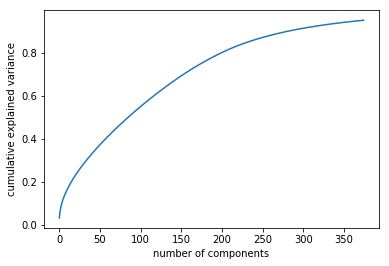

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [118]:
X_train_pca = X_train_pca.set_index(X_train.index)

In [119]:
#Look at five first rows of dataframe
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
eid,,,,,,,,,,,,,,,,,,,,,
1011243,-3.103287,0.554713,2.760134,2.932859,1.865357,-1.208706,1.990541,-1.780438,-0.056173,-1.186881,...,0.184326,-0.139391,0.222024,-0.024526,1.189440,-0.099746,-0.180343,0.688298,-0.145786,-0.162835
1085637,-3.591915,1.842718,-2.321146,-0.134173,-0.917384,1.258268,-1.191309,0.223828,-0.935304,0.287001,...,0.358456,0.393851,-0.041255,0.790789,-0.102017,0.341248,0.294612,0.443860,-0.318405,0.300715
1009332,0.256181,0.768271,2.717650,-0.552114,-0.029635,-2.777197,0.738322,-1.948629,-0.107238,0.257477,...,-0.201209,-0.448003,0.058008,-0.019388,0.407445,0.199490,-0.320775,0.229806,-0.054005,0.241155
3987492,-4.191123,-0.214652,0.290002,3.458851,-2.096590,-1.162217,0.707315,0.857569,0.005219,-1.175037,...,-0.001030,-0.180071,-0.128501,0.188274,0.431158,-0.149853,-0.369695,-0.297932,0.619185,-0.264727
1029035,2.657457,-1.862294,-0.226709,-1.520289,-1.231804,-2.650864,-0.980098,-0.415091,1.465445,-0.328022,...,-0.170272,0.415313,-0.222534,-0.305104,0.126452,0.373041,0.311475,-0.070942,-0.291872,-0.570831


In [120]:
#Transform on test set
X_test_pca = pd.DataFrame(pca.transform(X_test))

In [121]:
X_test_pca = X_test_pca.set_index(X_test.index)

In [123]:
#Look at five first rows of dataframe
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
eid,,,,,,,,,,,,,,,,,,,,,
1078679,-5.055861,-0.628958,1.082393,-2.168577,-1.086576,1.008399,-0.786085,-0.172794,-0.830191,2.240574,...,2.177276,0.525570,-0.362933,1.166109,1.407387,0.170254,0.256501,-0.777783,0.547210,1.048831
5342074,-1.754646,0.714324,3.286019,-2.521455,0.080127,1.852090,1.734559,-0.897251,-2.152163,3.766356,...,1.989252,0.323154,-0.102752,1.332873,0.452510,0.838291,-0.245652,-0.115701,-0.374256,2.106968
1653718,-2.351509,-1.942411,-2.485948,0.683906,-1.563061,-1.844197,-0.388083,2.099259,-0.452921,2.634416,...,2.068775,0.841341,-0.386541,1.170067,0.939958,0.178534,0.038863,-0.939304,0.832659,1.073102
1693933,-3.149646,-1.870081,-0.865907,-1.131826,1.958989,1.538354,1.320298,-0.092888,-1.410912,3.498987,...,1.544376,0.585388,-0.111204,1.180554,0.317884,-0.039881,-0.074955,-0.494870,0.177577,1.238053
1035064,1.954016,-0.164866,0.779440,-1.582118,2.641393,-5.106646,4.101532,0.080607,-2.557074,2.950704,...,2.540631,1.288544,-0.599715,1.326123,0.491636,-0.377359,0.776178,-1.128582,0.744975,1.160596


## Add age at recruitment and sex to df

In [135]:
data = pd.read_csv('working_dataset_2.csv', usecols = ['eid', 'X21022.0.0', 'X31.0.0.y', 'casecont'], low_memory=False)

In [136]:
data.head()

,eid,X21022.0.0,X31.0.0.y,casecont
0,1000015,65,1,0
1,1000027,66,1,0
2,1000039,69,1,0
3,1000040,50,0,0
4,1000053,46,1,0


In [137]:
train_data_pca_agesex = data.merge(X_train_pca, how = "right", left_on = "eid", right_index = True)

In [140]:
train_data_pca_agesex.shape

(11517, 379)

In [141]:
test_data_pca_agesex = data.merge(X_test_pca, how = "right", left_on = "eid", right_index = True)

In [143]:
test_data_pca_agesex.head()

,eid,X21022.0.0,X31.0.0.y,casecont,0,1,2,3,4,5,...,365,366,367,368,369,370,371,372,373,374
0,1000015,65,1,0,-3.032887,-1.668018,0.618267,-1.102886,0.645902,-1.550361,...,2.145292,0.551122,-0.269413,1.947941,0.921631,-0.306845,0.021965,-1.249173,-0.574656,0.638862
10,1000117,63,0,0,4.561033,-3.569321,0.683186,-1.539499,1.854227,1.237379,...,1.883532,1.452278,-0.603563,1.003782,0.644430,-0.272621,0.508942,-1.110878,0.584513,0.733759
12,1000132,63,0,0,2.192140,-4.201005,-1.036323,-1.046009,2.423900,2.434880,...,2.200523,0.456947,-0.191567,1.963474,1.141811,-0.004785,-0.029830,-0.149003,0.314343,1.241364
15,1000163,46,1,0,-2.932891,-1.388148,-0.892360,-0.732510,-1.924474,-0.806001,...,1.692876,-0.064172,-0.432889,0.935350,0.046824,0.334891,-0.273088,-0.553132,0.536134,0.905832
24,1000259,63,1,0,-1.804552,0.943959,-1.774790,0.478925,2.809788,-1.339151,...,1.677244,0.398013,0.028697,1.535763,1.070241,0.539388,0.586961,-0.668640,0.256903,1.252532


## Save these to csv in shared data folder

In [144]:
train_data_pca_agesex.to_csv("train_data_pca.csv")

In [145]:
test_data_pca_agesex.to_csv("test_data_pca.csv")

MERGE WITH HESIN (COMORBIDITIES) DATASET

In [146]:
#Import 10 year hesin dataset full_resolution_bin
hesin_10_yr = pd.read_csv("/rds/general/project/hda_students_data/live/Group9/General/Data/hes_10yr_A00Z99_bin.csv", low_memory=False)

In [150]:
#Print 10_year hesin shape
hesin_10_yr.head()

,eid,A02,A04,A06,A08,A09,A16,A26,A27,A28,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000027,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000039,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
hesin_10_yr = hesin_10_yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)

In [151]:
#Look at shape of merged train set
training_data_final = train_data_pca_agesex.merge(hesin_10_yr, on = "eid", how = "left")

In [153]:
training_data_final.shape

(11517, 1662)

In [154]:
testing_data_final = test_data_pca_agesex.merge(hesin_10_yr, on = "eid", how = "left")

In [156]:
testing_data_final.head()

,eid,X21022.0.0,X31.0.0.y,casecont,0,1,2,3,4,5,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000015,65,1,0,-3.032887,-1.668018,0.618267,-1.102886,0.645902,-1.550361,...,0,0,0,0,0,0,0,0,0,0
1,1000117,63,0,0,4.561033,-3.569321,0.683186,-1.539499,1.854227,1.237379,...,0,0,0,0,0,0,0,0,0,0
2,1000132,63,0,0,2.192140,-4.201005,-1.036323,-1.046009,2.423900,2.434880,...,0,0,0,0,0,0,0,0,0,0
3,1000163,46,1,0,-2.932891,-1.388148,-0.892360,-0.732510,-1.924474,-0.806001,...,0,0,0,0,0,0,0,0,0,0
4,1000259,63,1,0,-1.804552,0.943959,-1.774790,0.478925,2.809788,-1.339151,...,0,0,0,0,0,0,0,0,0,0


In [157]:
training_data_final.to_csv("train_10yr_hesin_pca.csv")

In [158]:
testing_data_final.to_csv("test_10yr_hesin_pca.csv")

In [195]:
os.chdir("/rds/general/project/hda_students_data/live/Group9/General/Data/1_3_5_10_hes")

In [196]:
hesin_5_yr = pd.read_csv("hes_5yr_A00Z99_bin.csv")

In [197]:
hesin_5_yr.head()

,eid,X21003.0.0,X31.0.0,casecont,triplet_id,A02,A04,A06,A08,A09,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000015,65,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000088,68,0,0,168,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000176,67,1,0,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000216,68,0,0,172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000265,40,0,0,332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
hesin_5_yr = hesin_5_yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)

In [199]:
training_data_final = train_data_pca_agesex.merge(hesin_5_yr, on = "eid", how = "left")

In [200]:
training_data_final.shape

(11517, 1548)

In [201]:
testing_data_final = test_data_pca_agesex.merge(hesin_5_yr, on = "eid", how = "left")

In [202]:
testing_data_final.head()

,eid,X21022.0.0,X31.0.0.y,casecont,0,1,2,3,4,5,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000015,65,1,0,-3.032887,-1.668018,0.618267,-1.102886,0.645902,-1.550361,...,0,0,0,0,0,0,0,0,0,0
1,1000117,63,0,0,4.561033,-3.569321,0.683186,-1.539499,1.854227,1.237379,...,0,0,0,0,0,0,0,0,0,0
2,1000132,63,0,0,2.192140,-4.201005,-1.036323,-1.046009,2.423900,2.434880,...,0,0,0,0,0,0,0,0,0,0
3,1000163,46,1,0,-2.932891,-1.388148,-0.892360,-0.732510,-1.924474,-0.806001,...,0,0,0,0,0,0,0,0,0,0
4,1000259,63,1,0,-1.804552,0.943959,-1.774790,0.478925,2.809788,-1.339151,...,0,0,0,0,0,0,0,0,0,0


In [203]:
training_data_final.shape

(11517, 1548)

In [204]:
training_data_final.to_csv("../Final_final_final_datasets/train_5yr_hesin_pca.csv")

In [205]:
testing_data_final.to_csv("../Final_final_final_datasets/test_5yr_hesin_pca.csv")

In [206]:
hesin_3_yr = pd.read_csv("hes_3yr_A00Z99_bin.csv")

In [209]:
hesin_3_yr.head()

,eid,A02,A04,A06,A08,A09,A31,A40,A41,A48,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000216,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000324,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [208]:
hesin_3_yr = hesin_3_yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)

In [210]:
training_data_final = train_data_pca_agesex.merge(hesin_3_yr, on = "eid", how = "left")

In [211]:
training_data_final.shape

(11517, 1466)

In [212]:
testing_data_final = test_data_pca_agesex.merge(hesin_3_yr, on = "eid", how = "left")

In [213]:
testing_data_final.head()

,eid,X21022.0.0,X31.0.0.y,casecont,0,1,2,3,4,5,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000015,65,1,0,-3.032887,-1.668018,0.618267,-1.102886,0.645902,-1.550361,...,0,0,0,0,0,0,0,0,0,0
1,1000117,63,0,0,4.561033,-3.569321,0.683186,-1.539499,1.854227,1.237379,...,0,0,0,0,0,0,0,0,0,0
2,1000132,63,0,0,2.192140,-4.201005,-1.036323,-1.046009,2.423900,2.434880,...,0,0,0,0,0,0,0,0,0,0
3,1000163,46,1,0,-2.932891,-1.388148,-0.892360,-0.732510,-1.924474,-0.806001,...,0,0,0,0,0,0,0,0,0,0
4,1000259,63,1,0,-1.804552,0.943959,-1.774790,0.478925,2.809788,-1.339151,...,0,0,0,0,0,0,0,0,0,0


In [214]:
training_data_final.to_csv("../Final_final_final_datasets/train_3yr_hesin_pca.csv")

In [215]:
testing_data_final.to_csv("../Final_final_final_datasets/test_3yr_hesin_pca.csv")

In [216]:
hesin_1_yr = pd.read_csv("hes_1yr_A00Z99_bin.csv")

In [219]:
hesin_1_yr.head()

,eid,A02,A04,A08,A09,A31,A40,A41,A48,A49,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000375,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,1000456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000507,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000522,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
hesin_1_yr = hesin_1_yr.drop(["X21003.0.0", "X31.0.0", "casecont", "triplet_id"], axis = 1)

In [220]:
training_data_final = train_data_pca_agesex.merge(hesin_1_yr, on = "eid", how = "left")

In [221]:
training_data_final.shape

(11517, 1230)

In [222]:
testing_data_final = test_data_pca_agesex.merge(hesin_1_yr, on = "eid", how = "left")

In [223]:
testing_data_final.head()

,eid,X21022.0.0,X31.0.0.y,casecont,0,1,2,3,4,5,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,1000015,65,1,0,-3.032887,-1.668018,0.618267,-1.102886,0.645902,-1.550361,...,0,0,0,0,0,0,0,0,0,0
1,1000117,63,0,0,4.561033,-3.569321,0.683186,-1.539499,1.854227,1.237379,...,0,0,0,0,0,0,0,0,0,0
2,1000132,63,0,0,2.192140,-4.201005,-1.036323,-1.046009,2.423900,2.434880,...,0,0,0,0,0,0,0,0,0,0
3,1000163,46,1,0,-2.932891,-1.388148,-0.892360,-0.732510,-1.924474,-0.806001,...,0,0,0,0,0,0,0,0,0,0
4,1000259,63,1,0,-1.804552,0.943959,-1.774790,0.478925,2.809788,-1.339151,...,0,0,0,0,0,0,0,0,0,0


In [224]:
training_data_final.to_csv("../Final_final_final_datasets/train_1yr_hesin_pca.csv")

In [225]:
testing_data_final.to_csv("../Final_final_final_datasets/test_1yr_hesin_pca.csv")